# Benchmarking the results of all the different iterations on the training data set

<ul>Starting Date: 43097 </ul>
<ul>Ending Date: 45289 </ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import itertools as it
import ast

import sys
sys.path.append('../src')
from utils import *

In [2]:
# Import the price data from "../Raw Data/ETF_PriceFile_2017_to_2025.csv"
df_price_all = pd.read_csv('../Raw Data/ETF_PriceFile_2017_to_2025.csv', index_col=0)

In [3]:
# Import the old score summary from "../Score Summary/df_score_summary_old_reg.csv"
df_score_summary_new = pd.read_csv('../Score Summary/df_score_summary_new_reg.csv')

In [4]:
# Import the results of the training test variations

df_results_variations = pd.read_csv("../Result_New_Variations/df_return_summary.csv")
df_real_reults_variations = pd.read_csv("../Result_New_Variations/df_real_return_summary.csv")

In [6]:
df_real_reults_variations

,Days Coefficient,Swap Threshold,Trade Threshold,Annualized Return %,Standard Deviation,Downside Deviation,Max Drawdown
0,0,0.000,0.015,3.49,29.22,23.52,-49.85
1,0,0.000,0.020,4.66,29.00,23.46,-48.79
2,0,0.000,0.030,7.75,29.20,23.34,-47.61
3,0,0.000,0.040,2.21,29.19,23.32,-45.51
4,0,0.000,0.050,2.94,29.76,24.65,-48.10
...,...,...,...,...,...,...,...
295,150,0.015,0.015,10.26,23.19,18.32,-31.90
296,150,0.015,0.020,8.68,23.12,18.34,-31.76
297,150,0.015,0.030,8.47,23.11,18.33,-31.77
298,150,0.015,0.040,8.56,23.08,18.25,-32.61


In [7]:
df_results_variations

,Days Coefficient,Swap Threshold,Trade Threshold,Annualized Return %,Standard Deviation,Downside Deviation,Max Drawdown
0,0,0.000,0.015,5.15,29.23,23.51,-49.67
1,0,0.000,0.020,6.02,29.00,23.44,-48.64
2,0,0.000,0.030,8.71,29.21,23.33,-47.51
3,0,0.000,0.040,2.84,29.19,23.32,-45.42
4,0,0.000,0.050,3.42,29.76,24.65,-48.03
...,...,...,...,...,...,...,...
295,150,0.015,0.015,10.91,23.20,18.33,-31.84
296,150,0.015,0.020,9.27,23.12,18.34,-31.55
297,150,0.015,0.030,9.00,23.11,18.34,-31.73
298,150,0.015,0.040,9.06,23.09,18.25,-32.09


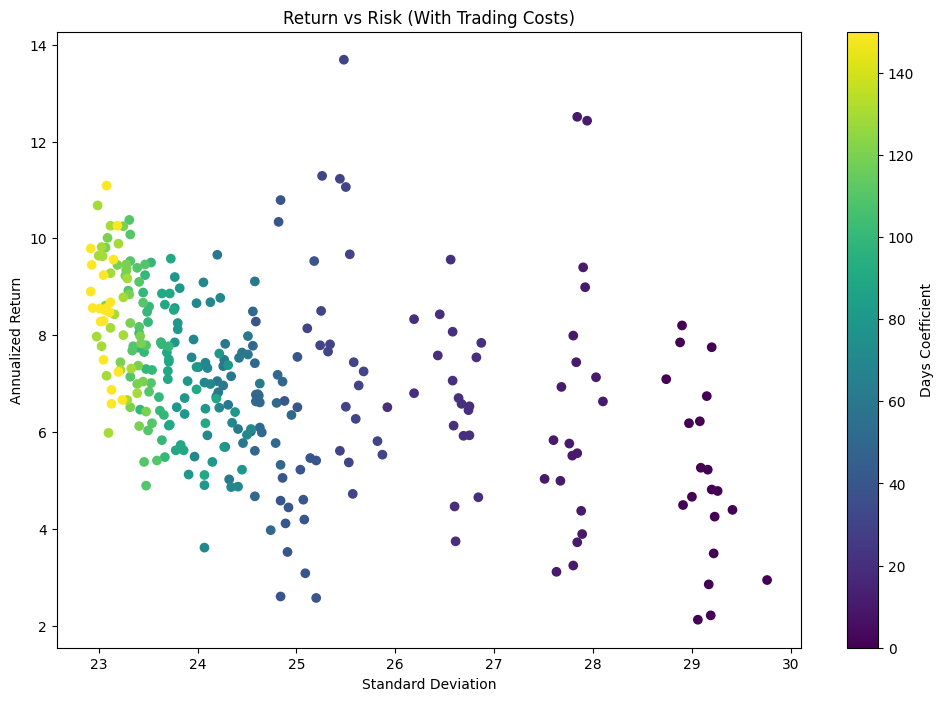

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(df_real_reults_variations["Standard Deviation"], df_real_reults_variations["Annualized Return %"], c = df_real_reults_variations["Days Coefficient"], cmap = "viridis")
plt.colorbar(label = "Days Coefficient")
plt.xlabel("Standard Deviation")
plt.ylabel("Annualized Return")
plt.title("Return vs Risk (With Trading Costs)")
plt.show()

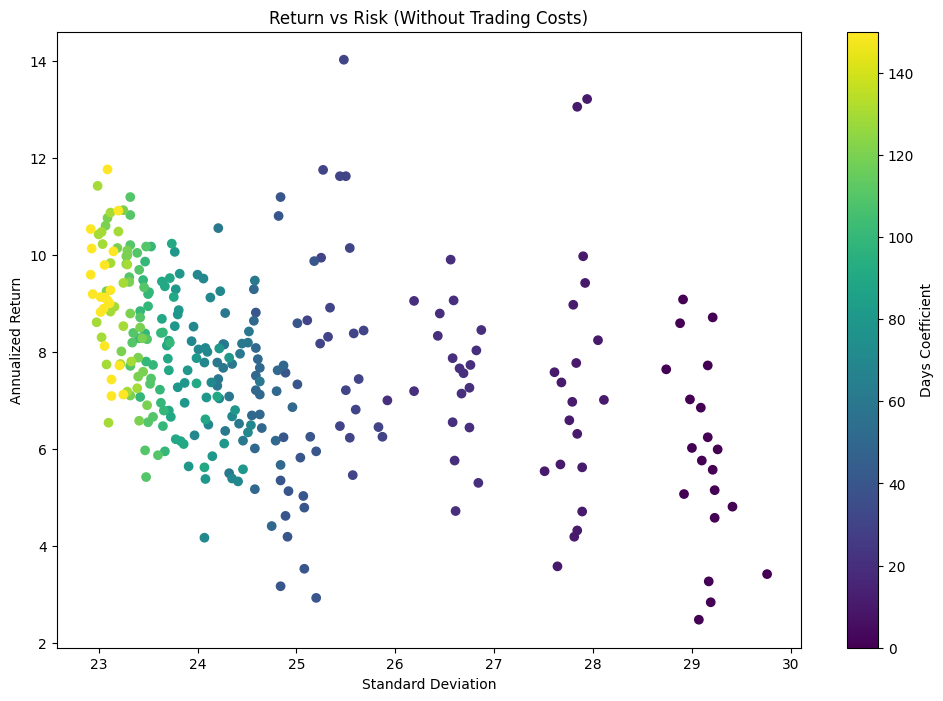

In [10]:
plt.figure(figsize = (12, 8))
plt.scatter(df_results_variations["Standard Deviation"], df_results_variations["Annualized Return %"], c = df_results_variations["Days Coefficient"], cmap = "viridis")
plt.colorbar(label = "Days Coefficient")
plt.xlabel("Standard Deviation")
plt.ylabel("Annualized Return")
plt.title("Return vs Risk (Without Trading Costs)")
plt.show()

In [12]:
df_real_reults_variations.groupby(["Swap Threshold", "Trade Threshold"])["Annualized Return %"].describe()

count      mean       std   min    25%   50%  \
Swap Threshold Trade Threshold                                                 
0.000          0.015             15.0  7.784000  1.997905  3.49  6.350  8.04   
               0.020             15.0  7.507333  2.011284  4.46  6.010  7.45   
               0.030             15.0  7.030000  1.048564  5.46  5.980  7.34   
               0.040             15.0  6.512000  2.437939  2.21  5.500  6.48   
               0.050             15.0  6.064667  1.788678  2.94  4.955  5.98   
0.005          0.015             15.0  7.631333  1.564599  4.37  6.830  7.81   
               0.020             15.0  7.602667  1.639588  3.74  7.090  7.54   
               0.030             15.0  6.774667  1.692225  3.61  5.965  7.14   
               0.040             15.0  7.007333  1.826970  4.11  6.090  7.04   
               0.050             15.0  7.241333  1.985983  2.85  6.355  6.93   
0.010          0.015             15.0  7.526000  2.096009  3.24  6.720  7.32   
               0.020             15.0  7.511333  1.793452  3.52  6.315  7.91   
               0.030             15.0  6.924667  1.542882  3.72  6.245  6.56   
               0.040             15.0  7.282000  2.088917  4.60  5.840  6.99   
               0.050             15.0  7.240000  2.175293  2.12  6.380  7.00   
0.015          0.015             15.0  7.644000  2.039211  3.89  6.535  8.20   
               0.020             15.0  7.300000  1.740858  4.65  5.870  7.05   
               0.030             15.0  6.390000  1.533260  3.08  5.545  6.83   
               0.040             15.0  6.272667  1.614605  2.57  5.710  5.94   
               0.050             15.0  7.591333  2.270906  4.25  6.675  7.01   

                                  75%    max  
Swap Threshold Trade Threshold                
0.000          0.015            9.420  10.38  
               0.020            9.280  10.68  
               0.030            7.870   8.61  
               0.040            7.630  12.43  
               0.050            7.410   8.77  
0.005          0.015            8.595   9.46  
               0.020            8.525  10.25  
               0.030            7.695   9.63  
               0.040            7.755  11.06  
               0.050            7.830  11.29  
0.010          0.015            9.095  11.09  
               0.020            8.720  10.26  
               0.030            8.010   9.28  
               0.040            8.205  12.51  
               0.050            8.110  11.23  
0.015          0.015            9.280  10.26  
               0.020            8.870   9.89  
               0.030            7.455   8.47  
               0.040            7.280   8.99  
               0.050            8.470  13.69